# Anatomy of Dataset and DataLoader

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# creating data

nOb, nF = 100, 20

data = np.random.randn(nOb, nF)

In [3]:
# converting into tensor

data_t = torch.tensor(data)

# some info
print('Numpy data: ', type(data), data.shape, data.dtype)
print('Tensor data: ', type(data_t), data_t.shape, data_t.dtype)

Numpy data:  <class 'numpy.ndarray'> (100, 20) float64
Tensor data:  <class 'torch.Tensor'> torch.Size([100, 20]) torch.float64


In [4]:
# converting data into other types
data_t2 = torch.tensor(data).float()
print(data_t2.dtype)

data_t3 = torch.tensor(data).long()  # long is for ints
print(data_t3.dtype)

torch.float32
torch.int64


In [5]:
# converting into pytorch datasets

ds = TensorDataset(data) # converting numpy array into dataset - not possible

TypeError: 'int' object is not callable

In [6]:
# converting a tensor data into dataaset

dataset = TensorDataset(data_t)
dataset.tensors

(tensor([[ 1.0796, -0.5601, -0.0794,  ..., -0.1082,  0.0551, -1.3876],
         [-0.8727,  0.1626,  0.4482,  ..., -0.2905,  2.3672,  1.2579],
         [ 0.3610, -1.3349, -1.3173,  ..., -1.5703,  0.9444, -1.1918],
         ...,
         [-1.3096,  0.2156,  0.1633,  ..., -0.6941, -0.0651,  0.4523],
         [-0.8149, -1.1991,  1.2333,  ...,  0.0452, -0.0601,  0.3250],
         [-0.3602, -0.7340, -0.2863,  ..., -0.3996,  0.9105,  1.3661]],
        dtype=torch.float64),)

Which is why we have to convert into tensors

In [7]:
# trying again with labels

labels = torch.ceil(torch.linspace(.01, 4, nOb))
labels = labels.reshape((len(labels), 1))
print(labels)

ds = TensorDataset(data_t, labels)
print(ds.tensors[0].shape)
print(ds.tensors[1].shape)

print(np.shape(np.random.randint(5,size=nOb)))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
      

In [13]:
# dataloader creation

bs = 25 # batch size
dl = DataLoader(ds, bs)
dl.dataset.tensors[1].shape # tensors[0] - features, tensors[1] - labels

torch.Size([100, 1])

In [14]:
# batch size and info
# when dl is accessed iterably, that is when it is broken into batches
for feat, lbls in dl:
    print('Batch Info:', feat.shape, lbls.shape)

Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])
Batch Info: torch.Size([25, 20]) torch.Size([25, 1])


In [15]:
for feat, lbls in dl:
    print(feat, lbls.T)

tensor([[ 1.0796, -0.5601, -0.0794, -0.7200,  1.3560, -1.7731,  0.0994,  0.6327,
          2.5012, -0.3359,  0.0619,  0.9694, -1.1556,  0.6945,  0.6053,  1.6418,
         -0.2927, -0.1082,  0.0551, -1.3876],
        [-0.8727,  0.1626,  0.4482,  0.8265, -0.1165, -0.7301, -1.1484,  2.2052,
         -1.2156,  1.0337,  0.2495,  2.0933,  0.1724,  0.0814, -0.0554,  1.9024,
         -0.8210, -0.2905,  2.3672,  1.2579],
        [ 0.3610, -1.3349, -1.3173,  0.9973,  0.3315,  1.1053, -0.2302, -1.4933,
          1.3182, -0.5136, -0.8359, -0.6944,  0.6865,  0.4999,  1.3040,  0.4571,
         -0.3075, -1.5703,  0.9444, -1.1918],
        [ 0.6697, -0.2883,  0.4447, -0.6558, -0.8778,  0.5689, -1.9473, -0.8309,
          0.8230,  0.7170, -0.1439, -0.1548,  0.9290, -2.3727,  2.7892,  0.5843,
          0.2320, -0.5539, -2.3189, -1.0821],
        [ 1.7744, -0.7087,  2.1533, -0.3201, -1.3408,  1.3301, -0.7071,  2.2378,
         -0.1220, -1.2030, -0.3827,  0.8582, -0.5016, -0.3417, -1.5515, -0.7580,
      

If we mention ```shuffle=True``` in dataloader parameters, data loader gets reshuffled everytime it is called in as an iterable

In [22]:
dl = DataLoader(ds, bs, shuffle=True)

In [36]:
for feat, lbls in dl:
    print(lbls.T)

tensor([[1., 2., 4., 4., 1., 2., 4., 2., 4., 4., 1., 2., 3., 2., 2., 4., 2., 1.,
         3., 3., 1., 2., 3., 4., 1.]])
tensor([[3., 1., 4., 3., 2., 1., 1., 3., 4., 4., 4., 2., 2., 2., 1., 2., 2., 3.,
         1., 3., 3., 1., 3., 1., 1.]])
tensor([[3., 1., 2., 1., 2., 2., 4., 3., 2., 1., 3., 4., 3., 3., 1., 4., 1., 3.,
         4., 4., 2., 3., 4., 3., 3.]])
tensor([[1., 4., 1., 1., 2., 4., 3., 4., 1., 4., 1., 4., 4., 2., 2., 2., 2., 2.,
         4., 3., 3., 3., 3., 1., 4.]])


In [42]:
# to get only one batch 

feat, labs = next(iter(dl))
lbls.T

tensor([[1., 4., 1., 1., 2., 4., 3., 4., 1., 4., 1., 4., 4., 2., 2., 2., 2., 2.,
         4., 3., 3., 3., 3., 1., 4.]])

# Parametric exp- width vs depth

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [51]:
def createData(npc):

    A = [ 1, 1 ]
    B = [ 5, 1 ]
    C = [ 4, 3 ]

    # generate data
    a = [ A[0]+np.random.randn(npc) , A[1]+np.random.randn(npc) ]
    b = [ B[0]+np.random.randn(npc) , B[1]+np.random.randn(npc) ]
    c = [ C[0]+np.random.randn(npc) , C[1]+np.random.randn(npc) ]

    # true labels
    labels_np = np.hstack((  np.zeros((npc)),
                             np.ones( (npc)),
                           1+np.ones( (npc))  ))

    # concatanate into a matrix
    data_np = np.hstack((a,b,c)).T
    
    #outputting in a dictionary
    
    op = {}
    op['data'] = torch.tensor(data_np).float()
    op['labels'] = torch.tensor(labels_np).long()
    
    X_train, X_test, y_train, y_test = train_test_split(op['data'], op['labels'], test_size=.1)

    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)

    bs = 8
    op['train_data'] = DataLoader(train_ds, batch_size=bs, shuffle=True, drop_last=True)
    op['test_data'] = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])
    
    return op

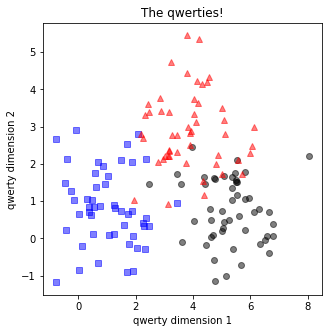

In [53]:
dt = createData(50)

data = dt['data']
labels = dt['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [57]:
def createNet(nUnits, nLayers):
    class qwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            self.layers = nn.ModuleDict() # dict to store layers of ANN
            self.nLayers = nLayers

            self.layers['inp'] = nn.Linear(2, nUnits) # input layer

            for i in range(nLayers): # hidden layers
                self.layers[f'hidden{i}']  = nn.Linear(nUnits, nUnits)

            self.layers['op'] = nn.Linear(nUnits, 3) # output layers

        def forward(self, x):
            x = self.layers['inp'](x)

            for i in range(self.nLayers):
                x = F.relu( self.layers[f'hidden{i}'](x) )

            x = self.layers['op'](x)

            return x
    
    net = qwertyNet(nUnits, nLayers)
    optim = torch.optim.SGD(net.parameters(), lr = 0.01)
    lossfn = nn.CrossEntropyLoss()
    
    return net, lossfn, optim

In [58]:
# test with fake data

nU, nL = 12, 4

net, lossfn, optim = createNet(nU, nL)
print(net)

ip = torch.rand(10, 2)
net(ip)

qwertyNet(
  (layers): ModuleDict(
    (inp): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (op): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[ 0.3980,  0.0979, -0.1664],
        [ 0.3957,  0.1002, -0.1680],
        [ 0.4017,  0.0951, -0.1640],
        [ 0.3974,  0.0993, -0.1675],
        [ 0.3932,  0.0976, -0.1645],
        [ 0.3954,  0.0955, -0.1634],
        [ 0.3951,  0.0970, -0.1646],
        [ 0.3977,  0.0988, -0.1671],
        [ 0.4008,  0.0950, -0.1645],
        [ 0.3948,  0.0977, -0.1652]], grad_fn=<AddmmBackward0>)

In [65]:
def trainNet(nUnits, nLayers):
    nEp = 50
    
    net, lossfn, optim = createNet(nU, nL)
    
    losses, trainAcc, testAcc = torch.zeros(nEp), [], []
    
    for i in range(nEp):
        
        batchAcc, batchLoss = [], []
        
        for X, y in train_data:
            yH = net(X)
            loss = lossfn(yH, y)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            batchLoss.append(loss.item())
            
            # compute accuracy
            matches = torch.argmax(yH,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # and get average losses across the batches
        losses[i] = np.mean(batchLoss)

        # test accuracy
        X,y = next(iter(test_data)) # extract X,y from test dataloader
        with torch.no_grad(): # deactivates autograd
            yH = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append( 100*torch.mean((torch.argmax(yH,axis=1)==y).float()) ) 
      # end epochs

      # function output
    return trainAcc,testAcc,losses,net

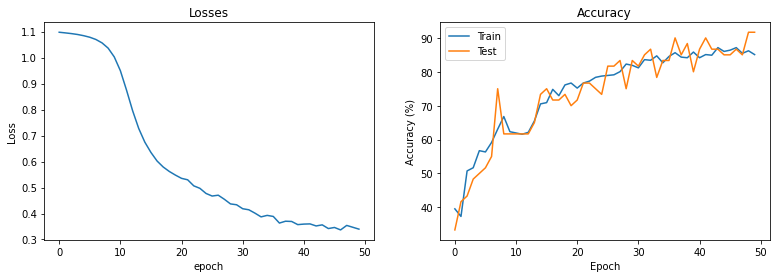

In [66]:
### Test the model once with a bit of data, just to make sure the code works.

# generate the data
theData = createData(200)
train_data = theData['train_data']
test_data  = theData['test_data']

# run the model
trainAcc,testAcc,losses,net = trainNet(80,1)



# show the results!
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

### Parametric exp

check number of parameters first

In [69]:
nodes = 80 # number of nodes in the model
layers = [1, 5, 10, 20]
nDP = np.arange(50, 551, 50) # number of data points

legend = []

for idx, layer in enumerate(layers):
    
    units = int(nodes/layers[idx]) # number of nodes per layer
    net = createNet(units, layer)[0]
    
    # counting parameters
    nP = np.sum([p.numel() for p in net.parameters() if p.requires_grad])
    
    legend.append( '%s layers, %s units, %s params' %(layer,units,nP) )
    print('This model will have %s layers, each with %s units, totalling %s parameters' %(layer,units,nP))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [72]:
res = np.zeros( (len(nDP), len(layers), 2) )

for didx, pnts in enumerate(nDP):
    theData = createData(pnts)
    train_data = theData['train_data']
    test_data = theData['test_data']
    
    for idx, layer in enumerate(layers):
    
        units = int(nodes/layers[idx]) # number of nodes per layer
        trainAcc, testAcc, losses, net = trainNet(units, layer)
        
        # accuracies and losses of last 5 epochs
        res[didx, idx, 0] = np.mean(testAcc[-5:])
        res[didx, idx, 1] = torch.mean(losses[-5:]).item()

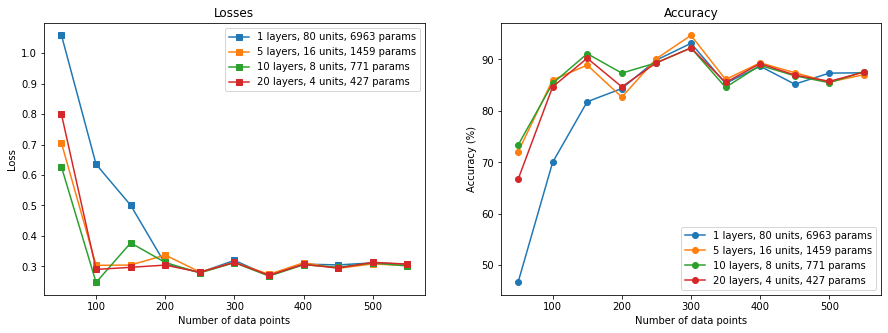

In [73]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(nDP,res[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDP,res[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()

# Dealing with imbalanced data

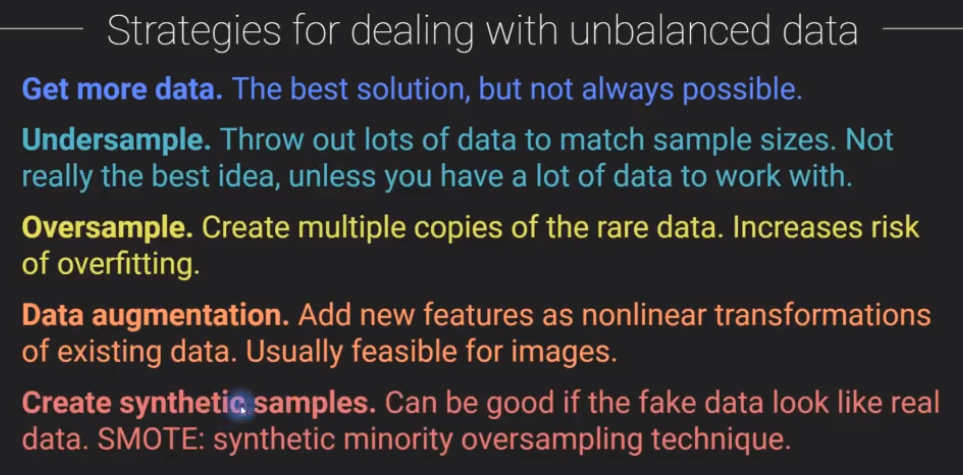

# Oversampling in MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [25]:
data_full = np.loadtxt(open('../data/mnist_train_small.csv', 'rb'), delimiter=',')

In [31]:
def makeData(N, doubleData=False):
    labels = data_full[:N,0]
    data = data_full[:N, 1:]
    
    dataNorm = data/np.max(data)
    
    # doubling data
#     if doubleData:
#         dataNorm = np.concatenate((dataNorm, dataNorm), axis=0)
#         labels = np.concatenate((labels, labels), axis=0)
        
    dataT = torch.tensor(dataNorm).float()
    labelsT = torch.tensor(labels).long()  # long = int64

    X_train, X_test, y_train, y_test = train_test_split(dataT, labelsT, test_size=.1)
    
    # doubling training data
    if doubleData:
        X_train = torch.cat((X_train, X_train), axis=0)
        y_train = torch.cat((y_train, y_train), axis=0)
        
    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)

    batchsize = 20
    trainLoader = DataLoader(train_ds, batch_size=batchsize, shuffle=True, drop_last=True)
    testLoader = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])
    
    return trainLoader, testLoader

In [32]:
def createMNISTNet():
    
    class MNISTNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.ip = nn.Linear(784, 64)
            self.h1 = nn.Linear(64, 32)
            self.h2 = nn.Linear(32, 32)
            self.op = nn.Linear(32, 10)
        
        def forward(self, x):
            x = F.relu(self.ip(x))
            x = F.relu(self.h1(x))
            x = F.relu(self.h2(x))
            return self.op(x)
            # using log_softmax explicitly as NLLLoss is used 
            # instead of CELoss that implicitly computes softmax
            
    net = MNISTNet()
    
    lossfn = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(net.parameters(), lr=.01)
    
    return net, lossfn, optim

In [33]:
# function to train the model

def trainModel():
    
    nEp = 50
    net, lossfn, optim = createMNISTNet()
    losses, trainAcc, testAcc = torch.zeros(nEp), [], []
    
    # train loop
    for i in range(nEp):
        
        batchAcc, batchLoss = [], []
        
        # batch loop
        for x, y in trainLoader:
            yH = net(x)
            loss = lossfn(yH, y)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            batchLoss.append(loss.item())
            
            matches = torch.argmax(yH, axis=1) == y
            matchesNum = matches.float()
            accPt = 100*torch.mean(matchesNum)
            batchAcc.append(accPt)
        # end of batch loop
        
        trainAcc.append(np.mean(batchAcc))
        losses[i] = np.mean(batchLoss)
        
        X, y = next(iter(testLoader))
        yH = net(X)
        
        testAcc.append( 100*torch.mean((torch.argmax(yH,axis=1)==y).float()) )
    # end of training loop
    
    return net, trainAcc, testAcc, losses

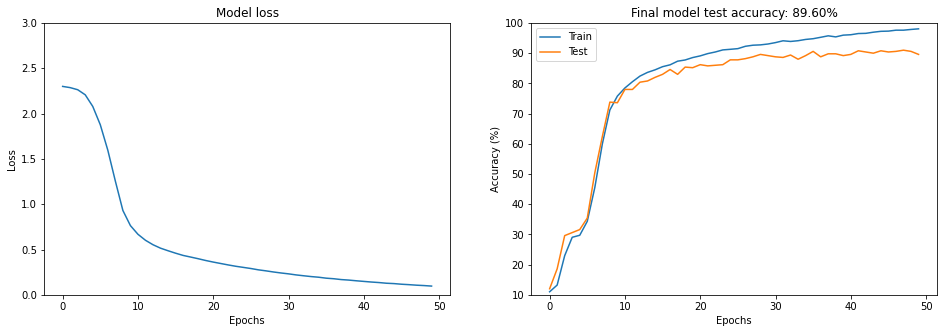

In [34]:
trainLoader, testLoader = makeData(5000)
net, trainAcc, testAcc, losses = trainModel()

# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

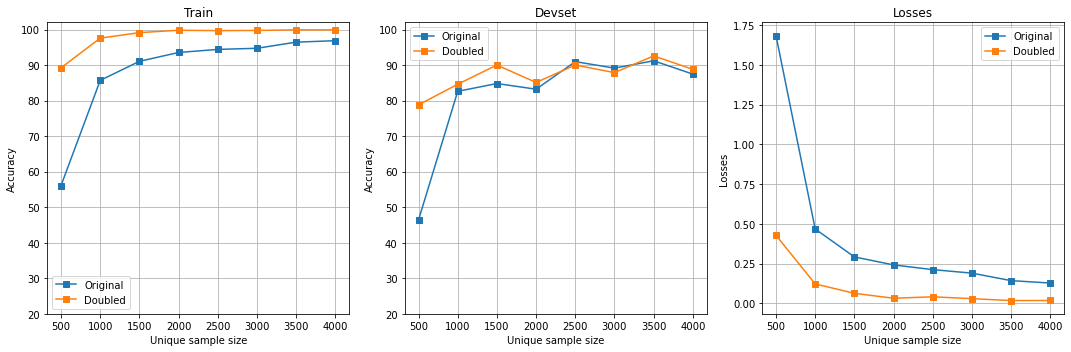

In [36]:
# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

    ### without doubling the data!

    # generate a dataset and train the model
    trainLoader,testLoader = makeData(ssize,False)
    net, trainAcc, testAcc, losses = trainModel()

    # grab the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(testAcc[-5:])
    resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


    ### with doubling the data!

    # generate a dataset and train the model
    trainLoader,testLoader = makeData(ssize,True)
    net, trainAcc, testAcc, losses = trainModel()

    # grab the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(testAcc[-5:])
    resultsDouble[idx,2] = torch.mean(losses[-5:]).item()

# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):
    
    # plot the lines
    ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
    ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')

    # make it look nicer
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel('Unique sample size')
    ax[i].grid('on')

    if i<2:
        ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()